In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [22]:
#Reading or basically fetching the data from the dataset
df = pd.read_csv('gold_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05/08/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [23]:
#knowing the datatypes of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [24]:
#Checking the missing values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [25]:
#Statistical Analysis of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
"""
    DATA VISULIZATION
    1)Heatmap
We are using heatmap to find out the correlation between the features how they are related to each other wether there is a postive correlation or a negative correlation
"""


'\n    DATA VISULIZATION\n    1)Heatmap\nWe are using heatmap to find out the correlation between the features how they are related to each other wether there is a postive correlation or a negative correlation\n'

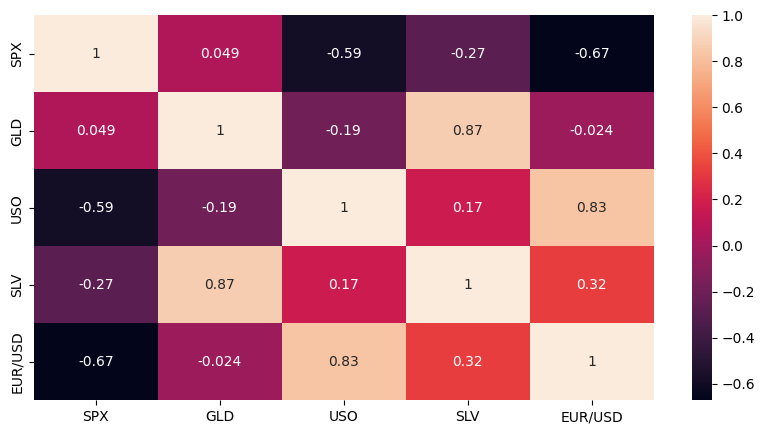

In [27]:


#for selection of only numeric values , a heatmap can be only generated whenever there are numeric values
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation for numeric columns
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

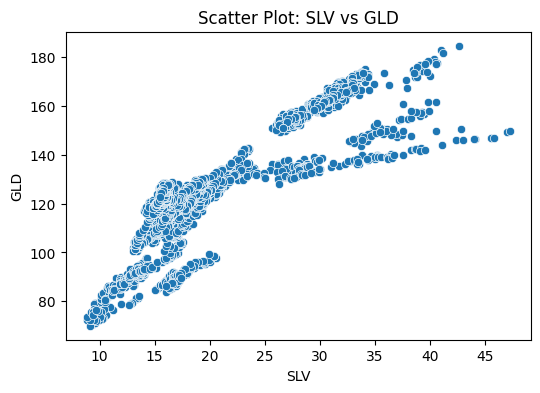

In [28]:
# Scatter plot between positively correlated features
target = 'GLD'  # Replace with your actual target column name
positively_correlated_features = ['SLV']  # Add other features with high correlation if necessary

for feature in positively_correlated_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'Scatter Plot: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


In [29]:
"""
 HeatMap Analysis:
 Postive Correlation
1)EUR/USD VS SLV
2)USO vs GLD
3)GLD VS SPK
"""

'\n HeatMap Analysis:\n Postive Correlation\n1)EUR/USD VS SLV\n2)USO vs GLD\n3)GLD VS SPK\n'

In [30]:
from sklearn.preprocessing import StandardScaler

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

features = df.drop(columns=['Date', 'GLD'])  # Assuming 'GLD' is your target column
target = df['GLD']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['GLD'] = target

print(scaled_data.head())

        SPX       USO       SLV   EUR/USD      Year     Month       Day  \
0 -0.399145  2.388810 -0.691720  1.429753 -1.578849 -1.484322 -1.560407   
1 -0.399145  2.383687 -0.676912  1.451035 -1.578849 -1.484322 -1.446045   
2 -0.467604  2.329381 -0.693553  1.458646 -1.578849 -1.484322 -1.331684   
3 -0.458837  2.236652 -0.709630  1.403954 -1.578849 -1.484322 -0.988600   
4 -0.508915  2.265342 -0.633900  2.079145 -1.578849 -1.484322 -0.874239   

         GLD  
0  84.860001  
1  85.570000  
2  85.129997  
3  84.769997  
4  86.779999  


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ... (Your previous code to load and preprocess the data)

# Convert the 'Date' column to datetime objects if you haven't already
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [32]:
#Dropping the unecessary feature which is date here and another is the dependent feature or the target variable which is GLD or gold basically
x = df.drop(['Date', 'GLD'], axis=1)  # Assuming 'GLD' is your target column
y = df['GLD']


In [33]:
#Splitting the data into training and testing in which the model will be trained on 80% data and 20% will be used for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import numpy as np

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
gb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(x_test)

# Evaluate the model
print('R^2:', metrics.r2_score(y_test, y_pred_gb))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

# Calculate accuracy (using R^2 as a proxy for accuracy in regression)
accuracy = metrics.r2_score(y_test, y_pred_gb)
print('Accuracy:', accuracy*100)

R^2: 0.9904842541530738
Mean Absolute Error: 1.687650390759919
Mean Squared Error: 5.2174824550511625
Root Mean Squared Error: 2.2841809155693342
Accuracy: 99.04842541530738


In [35]:
y_preds = model.predict(x_test)

In [36]:
#model score on trained data
r2_score = model.score(x_train,y_train)
print("The r2 score of our model on training is : ",r2_score*100)

The r2 score of our model on training is :  99.94721233704026


In [37]:
#model score on test data
model.score(x_test,y_test)
print("The r2 score of our model on test data is : ",r2_score*100)

The r2 score of our model on test data is :  99.94721233704026


In [38]:
#model training , so that we can deploy our model and use it for predictions
import joblib
joblib.dump(model,'gold_price_prediction_model.pkl')

['gold_price_prediction_model.pkl']

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test (actual values) and y_pred (predicted values) are already defined

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

# Display the results
print("Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R2 Score): {r2:.4f}")


Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.9367
Mean Squared Error (MSE): 2.1810
Root Mean Squared Error (RMSE): 1.4768
R-Squared (R2 Score): 0.9960


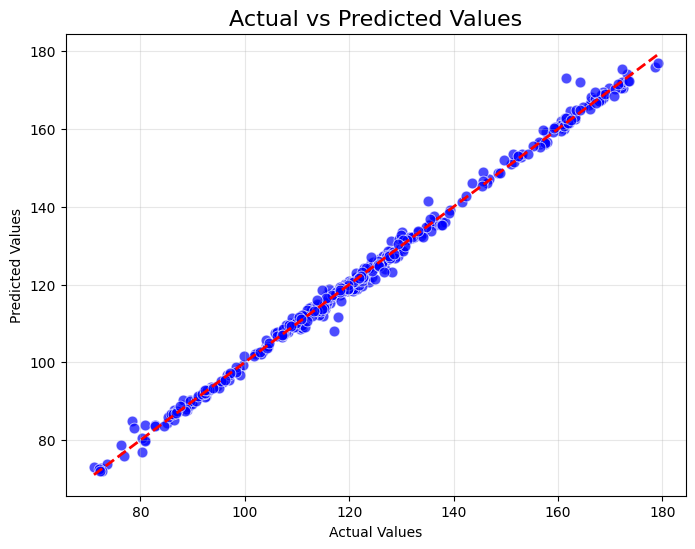

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_preds, color="blue", alpha=0.7, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(alpha=0.3)
plt.show()


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use TimeSeriesSplit for proper cross-validation
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=tscv, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [69]:
import joblib

# Load the trained model
loaded_model = joblib.load('gold_price_prediction_model.pkl')

example_input = pd.DataFrame({
    'SPX': [1400],
    'USO': [70],
    'SLV': [15],
    'EUR/USD': [1.35],
    'Day': [11],
    'Month': [1],
    'Year': [2050]
}, columns=['SPX', 'USO', 'SLV', 'EUR/USD', 'Year', 'Month', 'Day'])  # Specify column order


# Make a prediction
prediction = loaded_model.predict(example_input)
print("Predicted Gold Price:", prediction[0])

Predicted Gold Price: 112.66080069000009
